Control: /home/matt/creb/CREB9/mjd537/20180618-RF-MJD4-1-1-3 : 13185

CREB: /home/matt/creb/CREB7/mjd529/20180422-HR-1-1-3 : 12970

dn-CREB: /home/matt/creb/CREB7/mjd526/20180422-HR-1-1-3 : 12905

In [159]:
sns.set_style('white')
sns.set_context('notebook')

In [62]:
# old method, direct expt create and query activity 
from lab.classes import database
from lab.classes import pcExperimentGroup


e1 = database.createExperiment(trial_id = 13185)
e2 = database.createExperiment(trial_id = 12970)
e3 = database.createExperiment(trial_id = 12905)

label = 'suite2p_registered'

pc_kwargs = {'nPositionBins': 100,'channel': 'Ch2','imaging_label': 'suite2p_registered','demixed': False}
group=pcExperimentGroup([e1,e2,e3], label='', **pc_kwargs)



from lab.analysis.calc_activity import calc_activity

df_list = []


# get activity and rois, build df for later sorting
for e in group:
    act = calc_activity(e,label = 'suite2p_registered', method = 'norm transient auc2').squeeze()
    rois = e.rois(label=label)
    
    df_list.append(pd.DataFrame([act,rois]).transpose().rename(columns={0:'act',1:'roi'}))

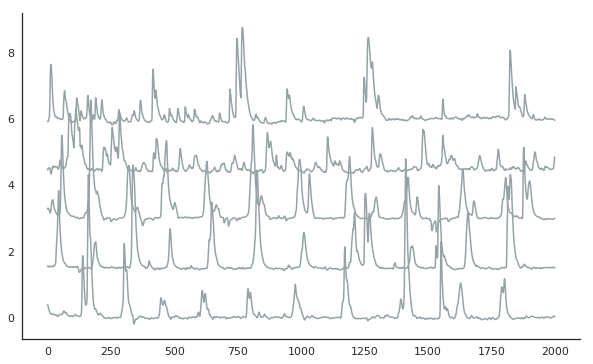

In [260]:
expt_ind=0


df = df_list[expt_ind]

df_high = df.sort_values(by='act',ascending=False).reset_index().iloc[4:9] # SELECT WHICH 5 ROIS


def act_filter(roi):
        return roi in set(df_high.roi.values)
    
data = group[expt_ind].imagingData(roi_filter=act_filter, channel='Ch2', label=label, dFOverF='from_file').squeeze()



scale=1.5
size=2000
start=1



d = data[:,start:start+size] + np.tile(np.arange(5)*scale,(size,1)).T

fig,ax = plt.subplots(1,figsize=(10,6))
ax.plot(d.T,color=colors[0])

sns.despine()

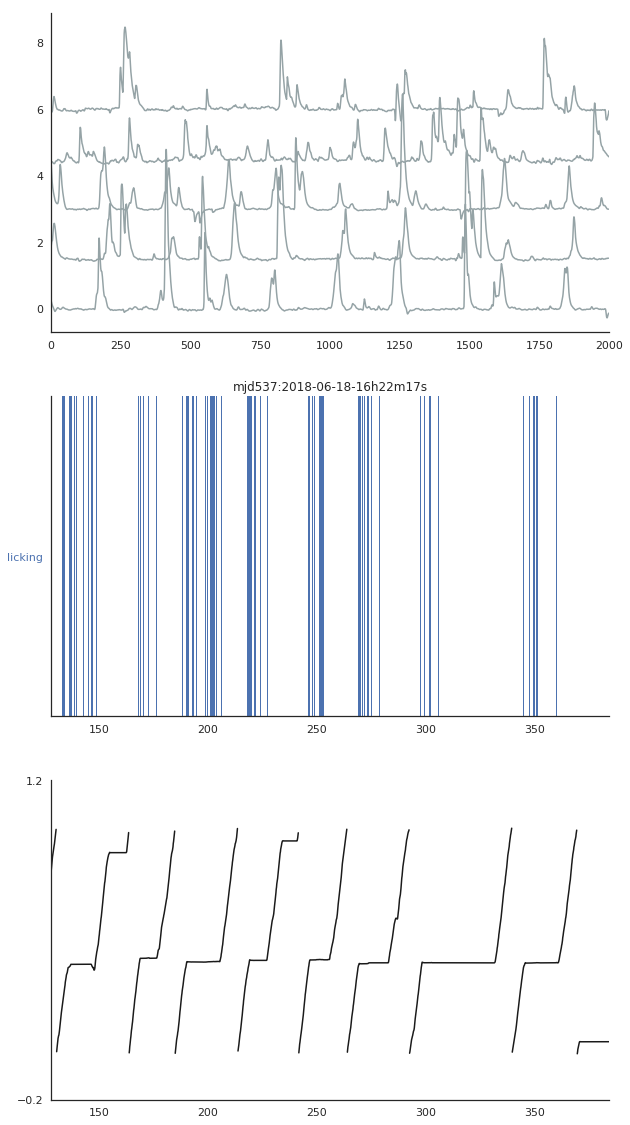

In [264]:
expt_ind=0
roi1= 4
roi2 = 9

scale=1.5
size=2000 # frame
start=1000


df = df_list[expt_ind]

df_high = df.sort_values(by='act',ascending=False).reset_index().iloc[roi1:roi2] # SELECT WHICH 5 ROIS


def act_filter(roi):
        return roi in set(df_high.roi.values)
    
data = group[expt_ind].imagingData(roi_filter=act_filter, channel='Ch2', label=label, dFOverF='from_file').squeeze()



scale=1.5
size=2000
start=1000



d = data[:,start:start+size] + np.tile(np.arange(5)*scale,(size,1)).T

# plot imaging
fig,axs = plt.subplots(3,1,figsize=(10,20))
axs[0].plot(d.T,color=colors[0])
axs[0].set(xlim=[0,2000],xlabel='',ylabel='')
sns.despine()



# beahvior
sf=7.8
start_s = int(start/sf)
end_s = int((start+size)/sf)

#fig,axs = plt.subplots(2,1,figsize=(10,6))
ap.behaviorPlot(group[expt_ind][0], axs[1], keys=['licking'], colors=None, include_empty=False)
#.axes(xlim=[0,100])

sns.despine()

place.plotPosition(
        group[expt_ind][0], ax=axs[2], rasterized=False,
        position_kwargs={'color': 'k'})

for ax in axs[1:]:
    ax.set(xlim=[start_s,end_s],xlabel='',ylabel='')



In [265]:
fig.savefig('figs/F11-traces-control.svg')

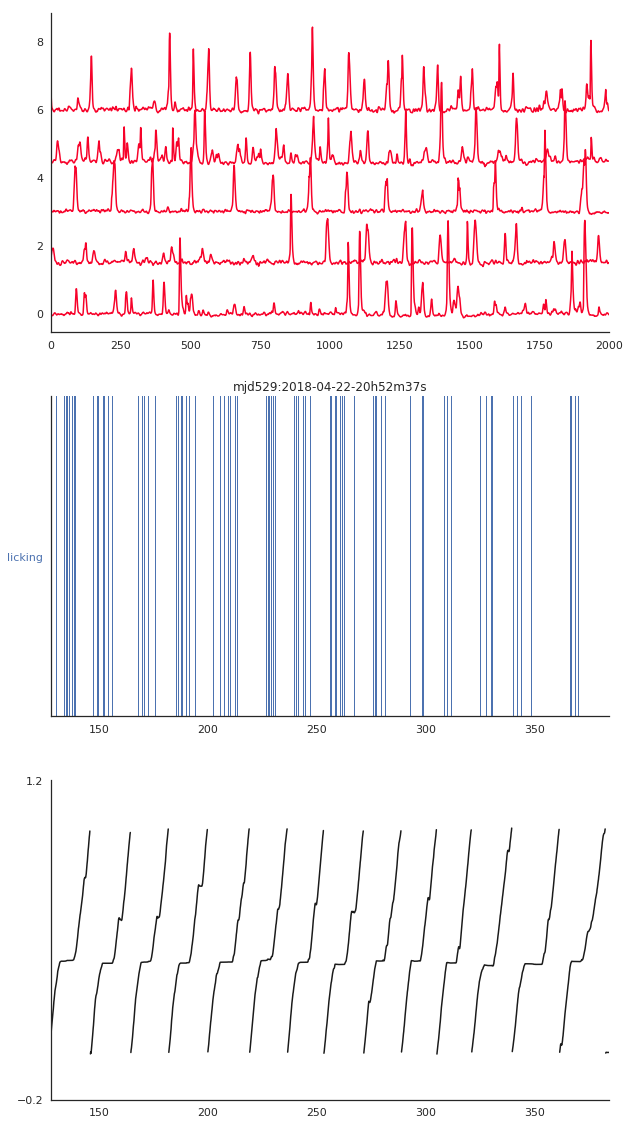

In [262]:
expt_ind=1
roi1= 5
roi2 = 10

scale=1.5
size=2000 # frame
start=1000


df = df_list[expt_ind]

df_high = df.sort_values(by='act',ascending=False).reset_index().iloc[roi1:roi2] # SELECT WHICH 5 ROIS


def act_filter(roi):
        return roi in set(df_high.roi.values)
    
data = group[expt_ind].imagingData(roi_filter=act_filter, channel='Ch2', label=label, dFOverF='from_file').squeeze()



scale=1.5
size=2000
start=1000



d = data[:,start:start+size] + np.tile(np.arange(5)*scale,(size,1)).T

# plot imaging
fig,axs = plt.subplots(3,1,figsize=(10,20))
axs[0].plot(d.T,color=colors[1])
axs[0].set(xlim=[0,2000],xlabel='',ylabel='')
sns.despine()



# beahvior
sf=7.8
start_s = int(start/sf)
end_s = int((start+size)/sf)

#fig,axs = plt.subplots(2,1,figsize=(10,6))
ap.behaviorPlot(group[expt_ind][0], axs[1], keys=['licking'], colors=None, include_empty=False)
#.axes(xlim=[0,100])

sns.despine()

place.plotPosition(
        group[expt_ind][0], ax=axs[2], rasterized=False,
        position_kwargs={'color': 'k'})

for ax in axs[1:]:
    ax.set(xlim=[start_s,end_s],xlabel='',ylabel='')



In [263]:
fig.savefig('figs/F11-traces-creb.svg')

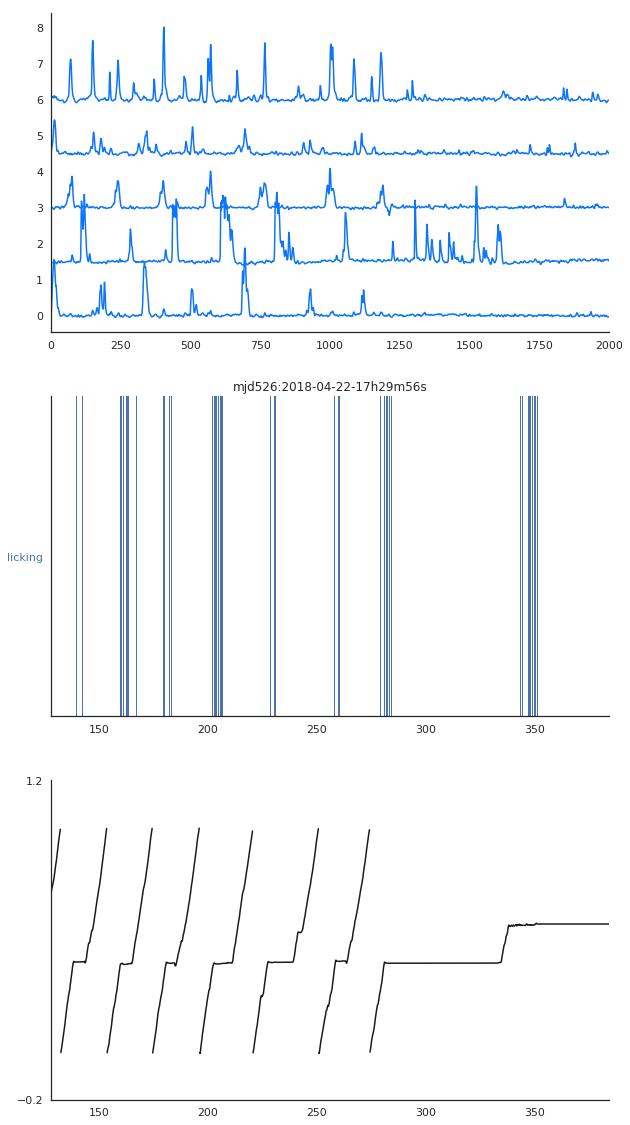

In [246]:
expt_ind=2

roi1=15
roi2=20
scale=1.5
size=2000
start=1000


df = df_list[expt_ind]

df_high = df.sort_values(by='act',ascending=False).reset_index().iloc[roi1roi2] # SELECT WHICH 5 ROIS


def act_filter(roi):
        return roi in set(df_high.roi.values)
    
data = group[expt_ind].imagingData(roi_filter=act_filter, channel='Ch2', label=label, dFOverF='from_file').squeeze()


d = data[:,start:start+size] + np.tile(np.arange(5)*scale,(size,1)).T

# plot imaging
fig,axs = plt.subplots(3,1,figsize=(10,20))
axs[0].plot(d.T,color=colors[2])
axs[0].set(xlim=[0,2000],xlabel='',ylabel='')
sns.despine()



# beahvior
sf=7.8
start_s = int(start/sf)
end_s = int((start+size)/sf)

#fig,axs = plt.subplots(2,1,figsize=(10,6))
ap.behaviorPlot(group[expt_ind][0], axs[1], keys=['licking'], colors=None, include_empty=False)
#.axes(xlim=[0,100])

sns.despine()

place.plotPosition(
        group[expt_ind][0], ax=axs[2], rasterized=False,
        position_kwargs={'color': 'k'})

for ax in axs[1:]:
    ax.set(xlim=[start_s,end_s],xlabel='',ylabel='')



In [247]:
fig.savefig('figs/F11-traces-dncreb.svg')

In [248]:
250/7.8

32.05128205128205

In [195]:
sf=7.8

start_s = int(1000/sf)
end_s = int(3000/sf)

256.4102564102564

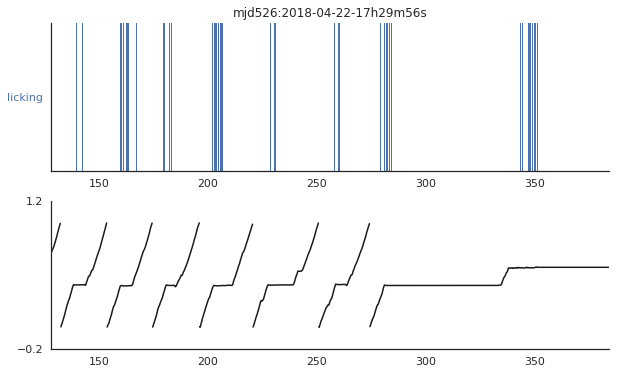

In [229]:
import lab.plotting.analysis_plotting as ap

fig,axs = plt.subplots(2,1,figsize=(10,6))



TypeError: 'AxesSubplot' object does not support indexing

In [206]:
t_range = np.linspace(s, e)

In [207]:
t_range

array([128.        , 130.6122449 , 133.2244898 , 135.83673469,
       138.44897959, 141.06122449, 143.67346939, 146.28571429,
       148.89795918, 151.51020408, 154.12244898, 156.73469388,
       159.34693878, 161.95918367, 164.57142857, 167.18367347,
       169.79591837, 172.40816327, 175.02040816, 177.63265306,
       180.24489796, 182.85714286, 185.46938776, 188.08163265,
       190.69387755, 193.30612245, 195.91836735, 198.53061224,
       201.14285714, 203.75510204, 206.36734694, 208.97959184,
       211.59183673, 214.20408163, 216.81632653, 219.42857143,
       222.04081633, 224.65306122, 227.26530612, 229.87755102,
       232.48979592, 235.10204082, 237.71428571, 240.32653061,
       242.93877551, 245.55102041, 248.16326531, 250.7755102 ,
       253.3877551 , 256.        ])